In [1]:
import sys
!{sys.executable} -m pip install plotly

In [2]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

## Lendo os Dados
- Base de dados retirada de: https://www.kaggle.com/ruchi798/malnutrition-across-the-globe?select=malnutrition-estimates.csv , publicada por Ruchi Bhatia
- Dados disponibilizados pela UNICEF
- Para mais informações sobre os dados, cheque: https://www.kaggle.com/ruchi798/malnutrition-across-the-globe

In [4]:
df_o = pd.read_csv('malnutrition-estimates.csv')
df_o

,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,ZWE,ZIMBABWE,2009,2009,1,0.0,1.0,1.0,"6,196",0.5,2.4,3.5,35.1,11.7,NaN,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe multiple indicator monitoring survey ...,MICS,1938.279
920,920,ZWE,ZIMBABWE,2010-11,2010,1,0.0,1.0,1.0,"5,414",0.8,3.2,5.8,32.2,10.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT) ...,Zimbabwe demographic and health survey 2010-11...,DHS,1997.281
921,921,ZWE,ZIMBABWE,2014,2014,1,0.0,1.0,1.0,"9,591",0.7,3.2,3.6,27.6,11.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe Multiple Indicator Cluster Survey 201...,MICS,2236.182
922,922,ZWE,ZIMBABWE,2015,2015,1,0.0,1.0,1.0,"6,380",1.1,3.3,5.6,27.1,8.5,NaN,Zimbabwe National Statistics Agency; ICF Inter...,"Zimbabwe Demographic and Health Survey 2015, N...",DHS,2258.788


In [5]:
df_o = df_o.drop(df_o.columns[0], axis=1)

## Explicando as Variáveis

In [6]:
col = []
for nm in df_o.columns:
    col.append(nm) 
expl = ['Código ISO do país',
        'Nome do pais', 
        'Ano(s) em que a pesquisa foi conduzida',
        'Ano de maior respostas da pesquisa e, portanto, mais representativo',
        'Renda média: Renda Baixa: 0, Renda Média-Baixa: 1, Renda Média-Alta: 2, Renda Alta: 3.',
        'Países Menos Desenvolvidos - Least Developed Countries (LDCs).',
        'Déficit Alimentar de Baixa Renda - Low Income Food Deficient (LIFD).',
        'Países em Desenvolvimento Sem Costa (LLDC): 1, Ilhas-Estados em Desenvolvimento (SIDS): 2, Outros: 0', 
        'Tamanho da amostra de pesquisa. Número total de respostas',
        '% de desnutrição aguda/severa em crianças de 0 a 59 meses',
        '% de desnutrição em crianças de 0 a 59 meses',
        '% de sobrepeso em crianças de 0 a 59 meses',
        '% de atrofia em crianças de 0 a 59 meses',
        '% de pessoas abaixo do peso em crianças de 0 a 59 meses',
        'Comentários',
        'Autor/órgão que publicou a pesquisa',
        'Órgão responsável pelo estudo',
        'Sigla do órgão responsável pelo estudo',
        'Número total de crianças com menos de 5 anos no país'
]

for cl, exp in zip(col, expl):
    print(f'{cl:21s} | {exp:40s}')
    print('-------------------------------'*4)

ISO code              | Código ISO do país                      
----------------------------------------------------------------------------------------------------------------------------
Country               | Nome do pais                            
----------------------------------------------------------------------------------------------------------------------------
Survey Year           | Ano(s) em que a pesquisa foi conduzida  
----------------------------------------------------------------------------------------------------------------------------
Year                  | Ano de maior respostas da pesquisa e, portanto, mais representativo
----------------------------------------------------------------------------------------------------------------------------
Income Classification | Renda média: Renda Baixa: 0, Renda Média-Baixa: 1, Renda Média-Alta: 2, Renda Alta: 3.
------------------------------------------------------------------------------------------------------

## Definição e Explicação do Modelo

### Modelo:
- Queremos **agrupar países semelhantes em questão à nutrição da população**.
- Elaborar e implementar campanhas e iniciativas de nutrição específicas para os países necessitados. 
- Assim, iremos usar um **método de agrupamento: o K-Means**. 

## Dataprep

### Exclusão de colunas
No dataset, existem colunas que não são relevantes para o modelo, portanto, serão excluídas, são elas:
- 'ISO code': O nome do país é suficiente para identificação;
- 'Survey Year': A coluna 'Year' apresenta o ano de maior número de respostas da pesquisa. Assim, elimina o problema da existência de múltiplos anos na mesma coluna, além de ser mais representativo;
- 'Notes': Comentários que não adicionam informação ao modelo;
- 'Report Author', 'Source' e 'Short Source': Laboratórios e órgãos governamentais que conduziram os estudos. Tais dados não acrescentam às informações relativas aos níveis de nutrição nos países.
- 'Survey Sample (N)': A quantidade de respostas não tem correlação direta com os níveis de nutrição no país. Além disso, acreditava-se que talvez esse valor pudesse ter uma correlação com a população do país (índice socioeconômico representativo), mas essa relação não é consistente. 

In [7]:
df = df_o.drop(columns=['ISO code', 'Survey Year', 'Survey Sample (N)', 'Notes', 'Report Author', 'Source', 'Short Source'], axis=1)
df

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,1997,0,1.0,1.0,1.0,NaN,18.2,6.5,53.2,44.9,3838.877
1,AFGHANISTAN,2004,0,1.0,1.0,1.0,3.5,8.6,4.6,59.3,32.9,4789.353
2,AFGHANISTAN,2013,0,1.0,1.0,1.0,4.0,9.5,5.3,40.4,24.6,5444.573
3,AFGHANISTAN,2018,0,1.0,1.0,1.0,1.6,5.1,4.1,38.2,19.1,5601.443
4,ALBANIA,1997,2,0.0,0.0,0.0,NaN,8.1,9.5,20.4,7.1,309.225
...,...,...,...,...,...,...,...,...,...,...,...,...
919,ZIMBABWE,2009,1,0.0,1.0,1.0,0.5,2.4,3.5,35.1,11.7,1938.279
920,ZIMBABWE,2010,1,0.0,1.0,1.0,0.8,3.2,5.8,32.2,10.2,1997.281
921,ZIMBABWE,2014,1,0.0,1.0,1.0,0.7,3.2,3.6,27.6,11.2,2236.182
922,ZIMBABWE,2015,1,0.0,1.0,1.0,1.1,3.3,5.6,27.1,8.5,2258.788


### Decisão de abordagem
 
Visto que o **intuito desse projeto é identificar as demandas dos países em relação à nutrição de suas populações**, serão **considerados somente os dados mais recentes de cada país**.

Assim, serão apagadas as linhas repetidas de países que possuem dados mais recentes, **preservando somente a linha com os dados mais recentes de cada país**.

In [8]:
ct = list(df.Country.unique())
df1 = df.copy()

for country in ct:
    mx = df1.loc[df1['Country'] == country].Year.max()
    df1.drop(df1.loc[(df1['Country'] == country) & (df1['Year'] != mx)].index, axis=0, inplace=True)
df1

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
3,AFGHANISTAN,2018,0,1.0,1.0,1.0,1.6,5.1,4.1,38.2,19.1,5601.443
8,ALBANIA,2017,2,0.0,0.0,0.0,0.5,1.6,16.4,11.3,1.5,176.522
15,ALGERIA,2012,2,0.0,0.0,0.0,1.4,4.1,12.4,11.7,3.0,4298.747
18,ANGOLA,2015,1,1.0,0.0,0.0,1.1,4.9,3.4,37.6,19.0,5192.358
22,ARGENTINA,2019,2,0.0,0.0,0.0,NaN,1.6,10.0,7.9,1.7,3741.882
...,...,...,...,...,...,...,...,...,...,...,...,...
876,VENEZUELA (BOLIVARIAN REPUBLIC OF),2009,2,0.0,0.0,0.0,NaN,4.1,6.4,13.4,2.9,2891.898
898,VIET NAM,2017,1,0.0,1.0,0.0,1.2,5.8,5.9,23.8,13.4,7743.873
905,YEMEN,2013,0,1.0,1.0,0.0,5.4,16.4,2.5,46.4,39.9,3836.334
913,ZAMBIA,2018,1,1.0,0.0,1.0,1.5,4.2,5.2,34.6,11.8,2868.914


### Tratamento de valores faltantes

In [9]:
col = df1.columns
for cl in col:
    vl = df1[cl].isnull().sum()
    if vl > 0:
        print(f'Coluna {cl} tem {vl} valores faltantes')
        print('------'*8)

Coluna Severe Wasting tem 21 valores faltantes
------------------------------------------------
Coluna Wasting tem 4 valores faltantes
------------------------------------------------
Coluna Overweight tem 8 valores faltantes
------------------------------------------------
Coluna Stunting tem 3 valores faltantes
------------------------------------------------
Coluna Underweight tem 5 valores faltantes
------------------------------------------------


In [10]:
print(f'Número de linhas com ao menos um valor faltante: {df1.isnull().any(axis = 1).sum()}')

Número de linhas com ao menos um valor faltante: 23


Os países abaixo apresentam valores faltantes:

In [11]:
df1.loc[df1.isnull().any(axis = 1)]

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
22,ARGENTINA,2019,2,0.0,0.0,0.0,NaN,1.6,10.0,7.9,1.7,3741.882
31,AUSTRALIA,2017,3,0.0,0.0,0.0,NaN,NaN,22.0,NaN,NaN,1595.449
39,BAHRAIN,1995,3,0.0,0.0,0.0,NaN,6.6,NaN,13.6,7.6,61.290
121,BURUNDI,2019,0,1.0,1.0,1.0,1.1,5.1,NaN,54.2,27.2,2018.697
123,CABO VERDE,1994,1,0.0,0.0,2.0,NaN,6.9,NaN,21.4,11.8,64.682
137,CANADA,2004,3,0.0,0.0,0.0,NaN,NaN,10.4,NaN,NaN,1697.603
143,CENTRAL AFRICAN REPUBLIC (THE),2018,0,1.0,1.0,1.0,NaN,6.6,NaN,40.8,20.8,727.432
163,CHILE,2014,3,0.0,0.0,0.0,NaN,0.3,9.3,1.8,0.5,1245.002
175,CHINA,2013,2,0.0,0.0,0.0,NaN,1.9,9.1,8.1,2.4,86717.349
198,COSTA RICA,2008,2,0.0,0.0,0.0,NaN,1.0,8.1,5.6,1.1,352.888


**Utilizaremos os últimos dados registrados sobre cada país para cada variável, de forma a preencher os valores faltantes**.
- Por exemplo: Uma vez que não temos os dados de 2019 de 'Overweight' em Burundi, usaremos o último registro obtido de 2016.

In [12]:
idx = list(df1.loc[df1.isnull().any(axis = 1)].index)

#for ix in idx:
    #print(df.iloc[ix-1, :])
    #print('-----'*12)

In [13]:
idx = list(df1.loc[df1.isnull().any(axis = 1)].index)

#for ix in idx:
    #print(df.iloc[ix-2, :])
    #print('-----'*12)

Células acima foram usadas para verificar os registros mais recentes dos países com valores faltantes. O código, aqui, foi comentado para não tornar o notebook muito extenso.

In [14]:
df1.loc[22, 'Severe Wasting'] = 0.2 # Argentina
df1.loc[31, 'Severe Wasting'] = 0.0 # Australia
df1.loc[31, 'Wasting'] = 0.0 # Australia
df1.loc[31, 'Stunting'] = 2.0 # Australia
df1.loc[31, 'Underweight'] = 0.2 # Australia
df1.loc[39, 'Overweight'] = 7.5 # Bahrain
df1.loc[121, 'Overweight'] = 1.4 # Burundi
df1.loc[143, 'Severe Wasting'] = 1.6 # Central African Republic
df1.loc[143, 'Overweight'] = 2.0 # Central African Republic
df1.loc[175, 'Severe Wasting'] = 0.7 # China
df1.loc[292, 'Severe Wasting'] = 0.1 # Germany
df1.loc[368, 'Overweight'] = 6.9 # Iran
df1.loc[417, 'Wasting'] = 12.6 # Kiribati
df1.loc[417, 'Overweight'] = 15.9 # Kiribati
df1.loc[417, 'Stunting'] = 34.3 # Kiribati
df1.loc[435, 'Severe Wasting'] = 0.6 # Kuwait
df1.loc[435, 'Underweight'] = 3.0 # Kuwait
df1.loc[658, 'Severe Wasting'] = 1.6 # Philippines
df1.loc[809, 'Severe Wasting'] = 0.5 # Turkey
df1.loc[841, 'Severe Wasting'] = 0.0 # United States of America
df1.loc[841, 'Underweight'] = 0.5 # United States of America

# Valores faltantes sem registro

#df1.loc[876, 'Severe Wasting'] = # Venezuela 
#df1.loc[661, 'Severe Wasting'] = # Qatar 
#df1.loc[660, 'Severe Wasting'] =  # Poland
#df1.loc[660, 'Wasting'] =  # Poland
#df1.loc[660, 'Overweight'] =  # Poland
#df1.loc[660, 'Underweight'] =  # Poland
#df1.loc[523, 'Severe Wasting'] = # Mauritius 
#df1.loc[498, 'Severe Wasting'] = # Malaysia 
#df1.loc[417, 'Severe Wasting'] = # Kiribati 
#df1.loc[206, 'Severe Wasting'] = # Cuba
#df1.loc[206, 'Overweight'] = # Cuba
#df1.loc[198, 'Severe Wasting'] = # Costa Rica 
#df1.loc[163, 'Severe Wasting'] = # Chile 
#df1.loc[137, 'Severe Wasting'] = # Canada
#df1.loc[137, 'Wasting'] = # Canada
#df1.loc[137, 'Stunting'] = # Canada
#df1.loc[137, 'Underweight'] = # Canada
#df1.loc[123, 'Severe Wasting'] =  # Cabo Verde 
#df1.loc[123, 'Overweight'] =  # Cabo Verde
#df1.loc[39, 'Severe Wasting'] = # Bahrain

Os países/valores estabelecidos como comentários, acima, **não apresentaram nenhum registro desses dados** no dataset.

Entretanto, foram **encontrados alguns dos dados faltantes no Data World Bank (UNICEF)**: https://data.worldbank.org/ . Abaixo, serão inseridos os dados obtidos na base (todos os valores estão em porcentagem):

In [15]:
df1.loc[198, 'Severe Wasting'] = 0.1 # Costa Rica (2018)
df1.loc[206, 'Severe Wasting'] = 0.6 # Cuba (2019)
df1.loc[417, 'Severe Wasting'] = 1.3 # Kiribati (2018)
df1.loc[498, 'Severe Wasting'] = 3.6 # Malaysia (2019)
df1.loc[660, 'Severe Wasting'] = 0.0 # Poland (2011)
df1.loc[206, 'Overweight'] = 10.3 # Cuba (2019)
df1.loc[660, 'Overweight'] = 5.0 # Poland (2011)
df1.loc[660, 'Underweight'] = 0.7 # Poland (2011)
df1.loc[660, 'Wasting'] = 0.7 # Poland (2011)

Outros dados faltantes foram encontrados no site do Global Nutrition Report, em: https://globalnutritionreport.org/resources/nutrition-profiles/

In [16]:
df1.loc[137, 'Underweight'] = 0.6 # Canada (2016)
df1.loc[123, 'Overweight'] =  12.5 # Cabo Verde (2016)

Por último, para informações de países em que não foram encontrados nenhum registro, será **usada a média dos valores dos países que fazem fronteira ou estejam muito próximos (que estejam nessa base de dados), de forma a preencher esses valores faltantes com uma estimativa próxima**. Essa decisão foi tomada, pois, em geral, países próximos apresentam índices socioeconômicos semelhantes.

Assim, por **exemplo**, temos para o valor faltante 'Severe Wasting' do Chile, a média entre os dados de 'Severe Wasting' de Argentina, Bolívia e Peru.

Os valores faltantes que restam são:
- df1.loc[39, 'Severe Wasting'] = # Bahrain 
- df1.loc[123, 'Severe Wasting'] =  # Cabo Verde
- df1.loc[137, 'Severe Wasting'] = # Canada
- df1.loc[137, 'Wasting'] = # Canada
- df1.loc[137, 'Stunting'] = # Canada
- df1.loc[163, 'Severe Wasting'] = # Chile 
- df1.loc[523, 'Severe Wasting'] = # Mauritius 
- df1.loc[661, 'Severe Wasting'] = # Qatar 
- df1.loc[876, 'Severe Wasting'] = # Venezuela 

In [17]:
front_chile = [22, 88, 647] # Argentina, Bolivia e Peru
front_bahrain = [689, 368] # Arábia Saudita e Irã
front_caboverde = [521, 703, 287, 320] # Mauritania, Senegal, Gambia e Guiné Bissau
front_canada = [841] # Estados Unidos da América
front_mauritius = [473, 555, 834, 923] # Madagascar, Moçambique, Tanzânia
front_qatar = [689, 368] # Arábia Saudita e Irã
front_venezuela = [182, 98, 796, 326, 238] # Colombia, Brasil, Trinidade e Tobago, Guiana e Equador
front = [front_chile, front_bahrain, front_caboverde, front_canada, front_mauritius, front_qatar, front_venezuela]
paises = [163, 39, 123, 137, 523, 661, 876] # Chile, Bahrein, Cabo Verde, Canadá, Ilhas Maurício, Catar e Venezuela

media = []

for num in range(0, 7):
    m = 0
    qtd = 0
    for ft in front[num]:
        me = df1.loc[ft, 'Severe Wasting']
        qtd += 1
        m += me
    m = m/qtd
    media.append(round(m, 1))
    

df1.loc[137, 'Wasting'] = df1.loc[841, 'Wasting'] # Canada
df1.loc[137, 'Stunting'] = df1.loc[841, 'Stunting'] # Canada

for p, num in zip(paises, range(0, 7)):
    df1.loc[p, 'Severe Wasting'] = media[num]

In [18]:
df1.loc[df1.isnull().any(axis = 1)]

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)


#### Agora, não temos mais nenhum valor faltante!

### Verificação de linhas duplicadas

In [19]:
dupl = list(df1.Country)
repetido = 0

for n in range(0, len(dupl)):
    if repetido == dupl[n]:
        print(dupl[n])
    repetido = dupl[n]

GAMBIA (THE)
RWANDA


In [20]:
df1.loc[(df1['Country'] == 'GAMBIA (THE)') | (df1['Country'] == 'RWANDA')]

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
286,GAMBIA (THE),2018,0,1.0,1.0,0.0,1.0,6.2,1.2,19.0,13.9,392.902
287,GAMBIA (THE),2018,0,1.0,1.0,0.0,1.3,6.0,2.5,13.6,10.3,392.902
678,RWANDA,2015,0,1.0,1.0,1.0,0.7,2.3,7.9,38.3,9.6,1690.202
679,RWANDA,2015,0,1.0,1.0,1.0,0.4,2.0,5.6,36.9,8.9,1690.202


Aqui, temos uma incogruência nos dados, onde as informações sobre os mesmos países nos mesmos anos são diversas. Em uma breve pesquisa no site: https://data.worldbank.org/ (dados da UNICEF), foi visto que estão atualizadas as linhas de índice 287 para Gâmbia e 679 para Ruanda. Assim, as **linhas (286 e 678) serão excluídas**.

**Vale ressaltar que, uma vez que utilizou-se o índice das linhas e não sua posição absoluta no conjunto de dados, essa alteração e duplicata não alteram em nada o que já foi feito**.

In [21]:
df1.drop([286, 678], axis=0, inplace=True)

## Análise Preliminar

In [22]:
df1.groupby(by=['Income Classification'])[['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight', "U5 Population ('000s)"]].mean()

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
Income Classification,,,,,,
0,2.238710,7.735484,3.435484,33.493548,19.316129,3469.779032
1,2.006522,6.636957,6.704348,25.810870,13.700000,6732.278239
2,1.212963,4.092593,9.318519,13.438889,5.053704,3341.429111
3,1.071429,3.285714,7.990476,7.538095,3.519048,2023.115810


#### Lembrando, Renda Baixa: 0, Renda Média-Baixa: 1, Renda Média-Alta: 2, Renda Alta: 3

- **A população de crianças abaixo de 5 anos nos países tende a diminuir com o aumento da renda média**. Entretanto, **países de renda baixa** (Income Classification = 0) apresentaram, em média, uma **população similar aos países de renda média-alta** (Income Classification = 2).
- Uma hipótese para tal acontecimento é que estados com uma **renda familiar menor tendem a ter uma mortalidade infantil maior**, possivelmente ocasionando nessa diferença.

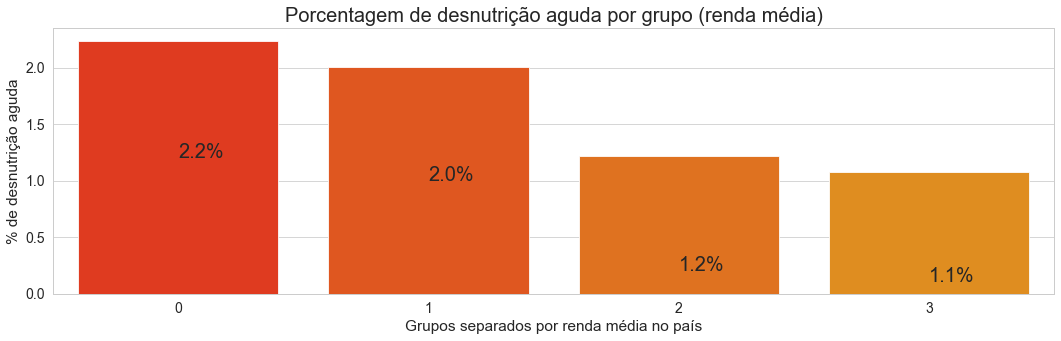

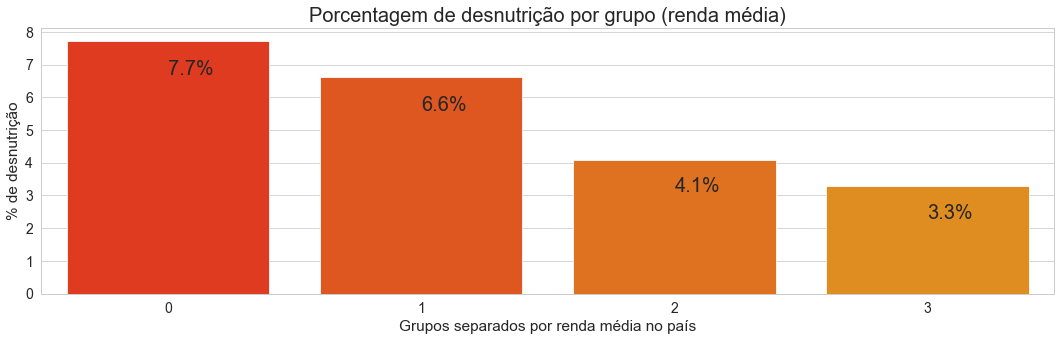

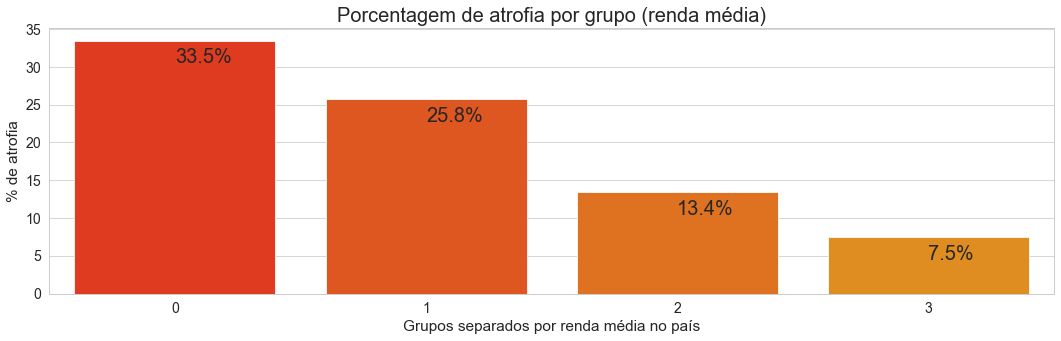

In [23]:
inc_clas = [0, 1, 2, 3]
plt.figure(figsize=(15, 5))
x = df1.groupby(by=['Income Classification'])[['Severe Wasting']].mean()
sns.set_theme(style='whitegrid', palette='autumn')
sns.set_context('paper', font_scale = 1.6)
ax = sns.barplot(x=inc_clas, y=x['Severe Wasting'])
plt.title('Porcentagem de desnutrição aguda por grupo (renda média)', fontsize=20)
ax.set_xlabel('Grupos separados por renda média no país')
ax.set_ylabel('% de desnutrição aguda')
menMeans = [2.2, 2.0, 1.2, 1.1]
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data-1 , s=f"{data}%" , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
x = df1.groupby(by=['Income Classification'])[['Wasting']].mean()
sns.set_theme(style='whitegrid', palette='autumn')
sns.set_context('paper', font_scale = 1.6)
ax = sns.barplot(x=inc_clas, y=x['Wasting'])
plt.title('Porcentagem de desnutrição por grupo (renda média)', fontsize=20)
ax.set_xlabel('Grupos separados por renda média no país')
ax.set_ylabel('% de desnutrição')
menMeans = [7.7, 6.6, 4.1, 3.3]
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data-1 , s=f"{data}%" , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
x = df1.groupby(by=['Income Classification'])[['Stunting']].mean()
sns.set_theme(style='whitegrid', palette='autumn')
sns.set_context('paper', font_scale = 1.6)
ax = sns.barplot(x=inc_clas, y=x['Stunting'])
plt.title('Porcentagem de atrofia por grupo (renda média)', fontsize=20)
ax.set_xlabel('Grupos separados por renda média no país')
ax.set_ylabel('% de atrofia')
menMeans = [33.5, 25.8, 13.4, 7.5]
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data-3 , s=f"{data}%" , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

Com base nesses gráficos, é possível afirmar:
- A **renda média tem uma grande correlação com os níveis de nutrição de um país**;
- Em média, **1/3 das crianças de 0 a 59 meses de países com renda familiar baixa (Income Classification = 0) sofrem de atrofia**;
- Enquanto países de renda média alta (Income Classification = 3) apresentaram que 1,1% de suas crianças sofrem com desnutrição aguda, países de renda média baixa (Income Classification = 0) registraram que, em média, 2,2% do mesmo grupo sofrem de desnutrição aguda. Dada a grande disparidade de condições socioeconômicas, esperava-se uma maior diferença entre os grupos. Tal comportamento pode ter sido causado por uma possível maior presença de desigualdades socioeconômicas em países do grupo 3;

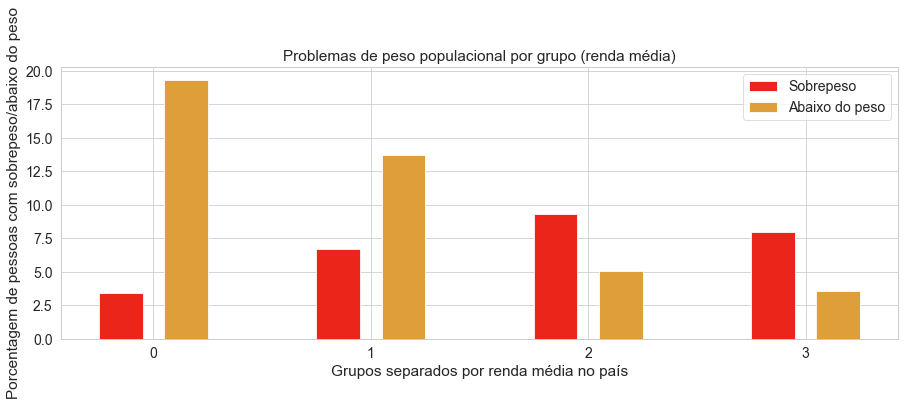

In [24]:
plt.figure(figsize=(15, 5))
x = df1.groupby(by=['Income Classification'])[['Overweight', 'Underweight']].mean()
x_arange = np.arange(0, len(x.index))
plt.bar(x_arange-0.15, x['Overweight'], width=.2, label='Sobrepeso', color='#EB2519')
plt.bar(x_arange, x['Overweight']*0, width=.2)
plt.bar(x_arange+0.15, x['Underweight'], width=.2, label='Abaixo do peso', color='#DE9E3A')
plt.ylabel('Porcentagem de pessoas com sobrepeso/abaixo do peso')
plt.xlabel('Grupos separados por renda média no país')
plt.title('Problemas de peso populacional por grupo (renda média)')
plt.legend()
plt.xticks([0, 1, 2, 3]);

Como esperado, é possível observar um padrão em que **com o aumento da renda média, os países aumentam a sua população com sobrepeso e diminuem a sua população abaixo do peso**. Isso, provavelmente, deve-se ao aumento do poder de compra que permite com que as crianças de 0 a 59 meses sejam melhor alimentadas.

Entretanto, o **grupo de países de renda alta apresentou uma porcentagem menor de crianças com sobrepeso**. Esse fenômeno, provavelmente, é causado por conta de que **condições socioeconômicas ótimas permitem uma maior conscientização e condições para uma alimentação mais saudável e controlada**.

### Infelizmente...
- GitHub aplica uma renderização estática dos notebooks, o que **não permite a plotagem dos gráficos interativos do plotly**. 
- Usado um **renderizador PNG** para que os gráficos possam ser visualizados como figuras estáticas. 

**O código dos gráficos interativos serão apresentados na mesma célula como comentários**.

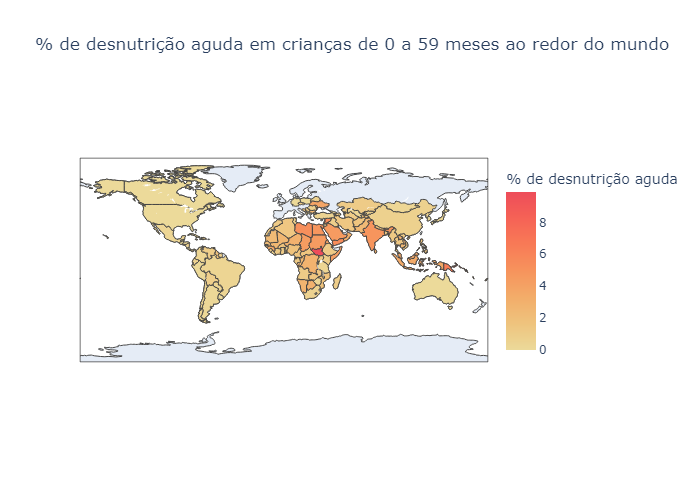

In [25]:
x = df1.groupby(["Country"])["Severe Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'% de desnutrição aguda', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="% de desnutrição aguda em crianças de 0 a 59 meses ao redor do mundo")
fig = go.Figure(data = [data],layout = layout)
fig.show(renderer="png")

'''''''''x = df1.groupby(["Country"])["Severe Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'% de desnutrição aguda', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="% de desnutrição aguda em crianças de 0 a 59 meses ao redor do mundo")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()''''''''';

Países e as seguintes regiões apresentaram maior índices de desnutrição aguda em crianças de 0 a 59 meses:
- Nordeste da África
- Sudão do Sul
- Índia
- Papua-Nova Guiné
- Síria
- Djibuti
- Iêmen
- Somália
- Arábia Saudita

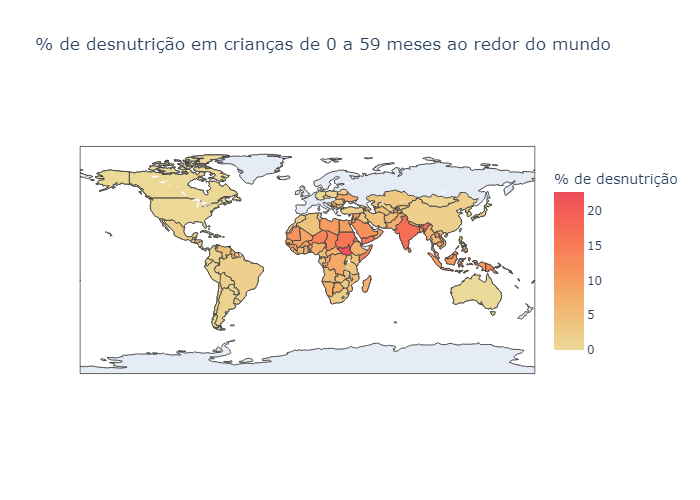

In [26]:
x = df1.groupby(["Country"])["Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'% de desnutrição', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="% de desnutrição em crianças de 0 a 59 meses ao redor do mundo")
fig = go.Figure(data = [data],layout = layout)
fig.show(renderer="png")

'''''''''x = df1.groupby(["Country"])["Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'% de desnutrição', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="% de desnutrição em crianças de 0 a 59 meses ao redor do mundo")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()''''''''';

Países e as seguintes regiões apresentaram maior índices de desnutrição em crianças de 0 a 59 meses:
- Centro da África
- Nordeste da África
- Índia
- Papua-Nova Guiné
- Sudão do Sul
- Chifre da África

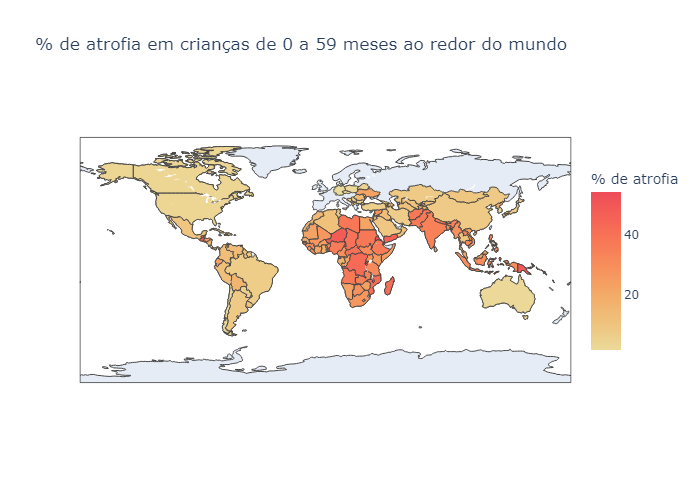

In [27]:
x = df1.groupby(["Country"])["Stunting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'% de atrofia', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="% de atrofia em crianças de 0 a 59 meses ao redor do mundo")
fig = go.Figure(data = [data],layout = layout)
fig.show(renderer="png")

'''''''''x = df1.groupby(["Country"])["Stunting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'% de atrofia', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="% de atrofia em crianças de 0 a 59 meses ao redor do mundo")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()''''''''';

Países e as seguintes regiões apresentaram maior índices de atrofia em crianças de 0 a 59 meses:
- África com exceção do Magrebe Central
- Guatemala
- Iêmen
- Sudeste asiático
- Ásia Meridional
- Afeganistão
- Papua-Nova Guiné

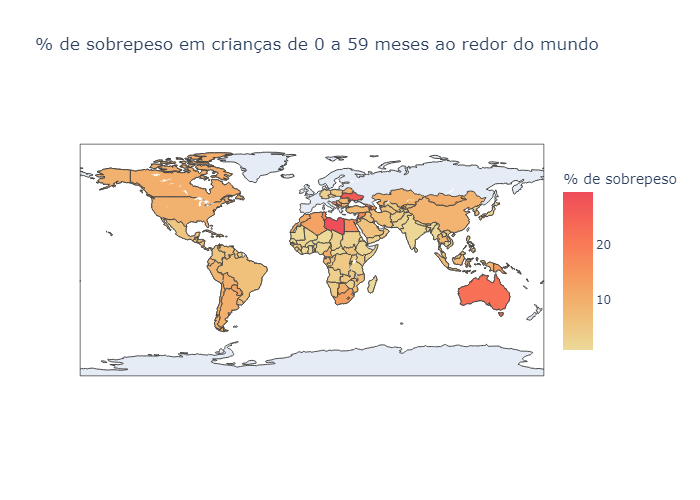

In [28]:
x = df1.groupby(["Country"])["Overweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'% de sobrepeso', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="% de sobrepeso em crianças de 0 a 59 meses ao redor do mundo")
fig = go.Figure(data = [data],layout = layout)
fig.show(renderer="png")

'''''''''x = df1.groupby(["Country"])["Overweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'% de sobrepeso', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="% de sobrepeso em crianças de 0 a 59 meses ao redor do mundo")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()''''''''';

Países e as seguintes regiões apresentaram maior índices de sobrepeso em crianças de 0 a 59 meses:
- Norte da África
- Balcãs
- Cáucaso
- Austrália
- Síria
- Ucrânia
- Líbano

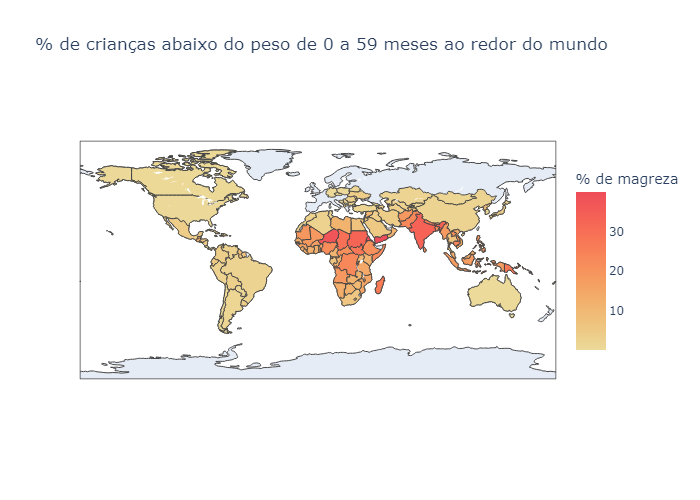

In [29]:
x = df1.groupby(["Country"])["Underweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'% de magreza', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="% de crianças abaixo do peso de 0 a 59 meses ao redor do mundo")
fig = go.Figure(data = [data],layout = layout)
fig.show(renderer="png")

'''''''''x = df1.groupby(["Country"])["Underweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'% de magreza', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="% de crianças abaixo do peso de 0 a 59 meses ao redor do mundo")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()''''''''';

Países e as seguintes regiões apresentaram maior índices de crianças entre 0 a 59 meses abaixo do peso:
- Centro da África
- Papua-Nova Guiné
- Ásia Meridional
- Chifre da África
- Madagascar

A título de curiosidade, podemos ver a **evolução dos índices dessa base ao longo dos anos**. Para isso, usaremos o dataframe inicial 'df'.

In [30]:
ys = list(df.Year)
ys_set = set(ys)
ys = (list(ys_set))
ys.sort()

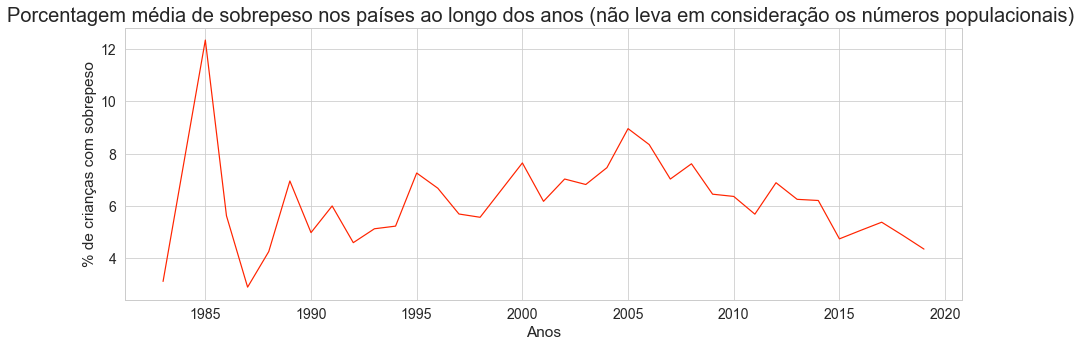

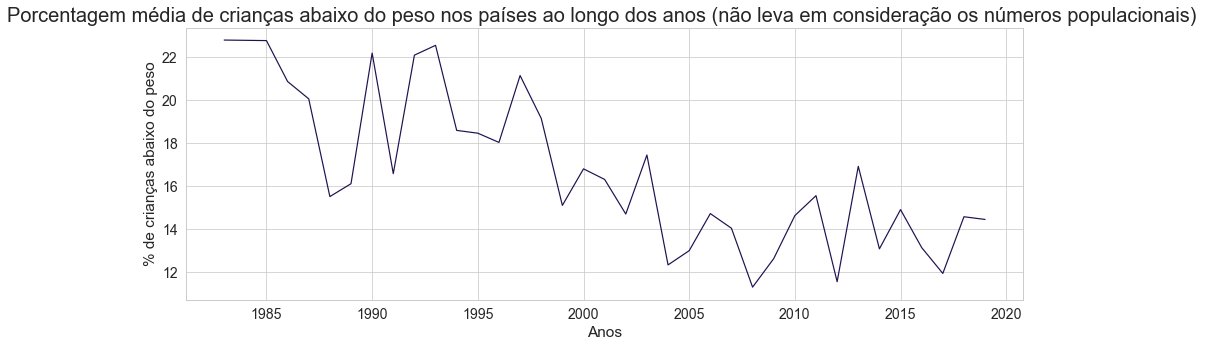

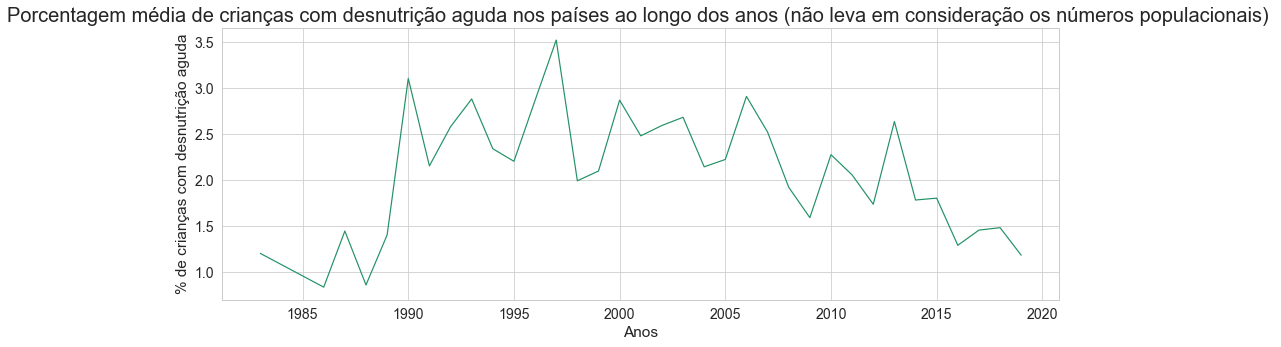

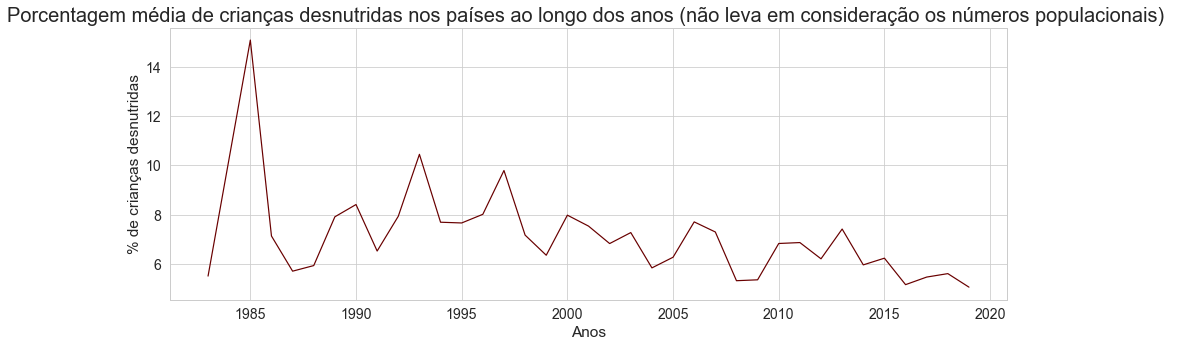

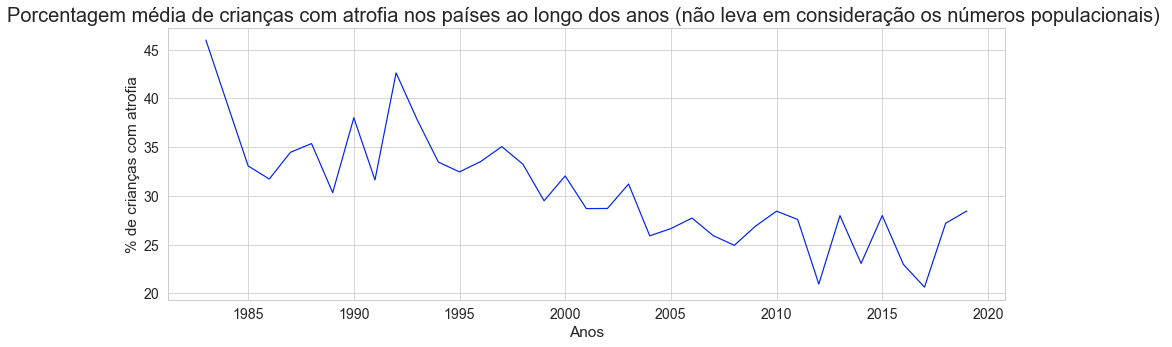

In [31]:
plt.figure(figsize=(15, 5))
x = df.groupby(by=['Year'])[['Overweight', 'Underweight', 'Stunting', 'Severe Wasting', 'Wasting']].mean()
sns.set_theme(style='whitegrid', palette='autumn')
sns.set_context('paper', font_scale = 1.6)
ax = sns.lineplot(x=ys, y=x['Overweight'])
plt.title('Porcentagem média de sobrepeso nos países ao longo dos anos (não leva em consideração os números populacionais) ', fontsize=20)
ax.set_xlabel('Anos')
ax.set_ylabel('% de crianças com sobrepeso')

plt.figure(figsize=(15, 5))
sns.set_theme(style='whitegrid', palette='magma')
sns.set_context('paper', font_scale = 1.6)
ax = sns.lineplot(x=ys, y=x['Underweight'])
plt.title('Porcentagem média de crianças abaixo do peso nos países ao longo dos anos (não leva em consideração os números populacionais) ', fontsize=20)
ax.set_xlabel('Anos')
ax.set_ylabel('% de crianças abaixo do peso')

plt.figure(figsize=(15, 5))
sns.set_theme(style='whitegrid', palette='summer')
sns.set_context('paper', font_scale = 1.6)
ax = sns.lineplot(x=ys, y=x['Severe Wasting'])
plt.title('Porcentagem média de crianças com desnutrição aguda nos países ao longo dos anos (não leva em consideração os números populacionais) ', fontsize=20)
ax.set_xlabel('Anos')
ax.set_ylabel('% de crianças com desnutrição aguda')

plt.figure(figsize=(15, 5))
sns.set_theme(style='whitegrid', palette='hot')
sns.set_context('paper', font_scale = 1.6)
ax = sns.lineplot(x=ys, y=x['Wasting'])
plt.title('Porcentagem média de crianças desnutridas nos países ao longo dos anos (não leva em consideração os números populacionais) ', fontsize=20)
ax.set_xlabel('Anos')
ax.set_ylabel('% de crianças desnutridas')

plt.figure(figsize=(15, 5))
sns.set_theme(style='whitegrid', palette='winter')
sns.set_context('paper', font_scale = 1.6)
ax = sns.lineplot(x=ys, y=x['Stunting'])
plt.title('Porcentagem média de crianças com atrofia nos países ao longo dos anos (não leva em consideração os números populacionais) ', fontsize=20)
ax.set_xlabel('Anos')
ax.set_ylabel('% de crianças com atrofia');

#### É importante ressaltar que, aqui o propósito não é ter uma noção dos dados para a população mundial, visto que a quantidade de pessoas não é levada em consideração, assim como não são todos os países que estão nessa lista.

#### O intuito dos gráficos acima é ver a evolução desses índices ao longo do tempo, para ter uma noção de possíveis melhoras ou pioras.

Por meio da observação desses gráficos, é possível observar:
- **Sobrepeso**: O ano de 1985 registrou um número muito maior de crianças com sobrepeso. Após um aumento de 1987 a 2005, a porcentagem média mundial de crianças entre 0 e 59 meses com sobrepeso vem diminuindo.
- **Abaixo do peso**: Em termos gerais, a porcentagem de crianças entre 0 e 59 meses abaixo do peso vem diminuindo do início dos registros da base até por volta do ano de 2008. Desde então, os números vêm oscilando, apresentando altas e baixas.
- **Desnutrição aguda**: Os índices de desnutrição aguda aumentaram, em média, do início dos registros da base até o ano de 1997. Desde então, os números estão mostrando uma diminuição.
- **Desnutrição**: O ano de 1985 registrou um número muito maior de crianças desnutridas.
- **Atrofia**: A porcentagem média mundial de crianças entre 0 e 59 meses que tinham atrofia antes de 1985 era expressivamente maior. Em termos gerais, esse índice caiu até 2008. Desde então, os números vêm oscilando, apresentando altas e baixas.

**Padrões observados**:
- O ano de 1985 registrou um número atípico de crianças desnutridas e com sobrepeso.
- Até o ano de 2008, a maior parte dos índices da base diminuíram. Desde então, estes vêm oscilando com altas e baixas. Tal efeito, possivelmente, foi causado pela crise de 2008, que desestruturou socioeconomicamente países, causando tal instabilidade.

## Escalar as variáveis

In [32]:
X_o = df1.drop(columns=['Country', 'Year'])
X_o

,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
3,0,1.0,1.0,1.0,1.6,5.1,4.1,38.2,19.1,5601.443
8,2,0.0,0.0,0.0,0.5,1.6,16.4,11.3,1.5,176.522
15,2,0.0,0.0,0.0,1.4,4.1,12.4,11.7,3.0,4298.747
18,1,1.0,0.0,0.0,1.1,4.9,3.4,37.6,19.0,5192.358
22,2,0.0,0.0,0.0,0.2,1.6,10.0,7.9,1.7,3741.882
...,...,...,...,...,...,...,...,...,...,...
876,2,0.0,0.0,0.0,1.0,4.1,6.4,13.4,2.9,2891.898
898,1,0.0,1.0,0.0,1.2,5.8,5.9,23.8,13.4,7743.873
905,0,1.0,1.0,0.0,5.4,16.4,2.5,46.4,39.9,3836.334
913,1,1.0,0.0,1.0,1.5,4.2,5.2,34.6,11.8,2868.914


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_esc = scaler.fit_transform(X_o)
X = pd.DataFrame(X_esc, index=X_o.index, columns=X_o.columns)
X

,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
3,-1.481203,1.494671,1.407264,0.516738,-0.026427,-0.090391,-0.590489,1.367097,0.942993,0.112081
8,0.593846,-0.669043,-0.710599,-0.750104,-0.706204,-0.893192,1.795460,-0.705651,-0.957486,-0.325414
15,0.593846,-0.669043,-0.710599,-0.750104,-0.150023,-0.319762,1.019542,-0.674829,-0.795513,0.007024
18,-0.443678,1.494671,-0.710599,-0.750104,-0.335416,-0.136265,-0.726275,1.320864,0.932195,0.079090
22,0.593846,-0.669043,-0.710599,-0.750104,-0.891597,-0.893192,0.553991,-0.967634,-0.935889,-0.037884
...,...,...,...,...,...,...,...,...,...,...
876,0.593846,-0.669043,-0.710599,-0.750104,-0.397214,-0.319762,-0.144336,-0.543838,-0.806311,-0.106432
898,-0.443678,-0.669043,1.407264,-0.750104,-0.273618,0.070170,-0.241326,0.257522,0.327497,0.284858
905,-1.481203,1.494671,1.407264,-0.750104,2.321893,2.501512,-0.900857,1.998938,3.189014,-0.030267
913,-0.443678,1.494671,-0.710599,0.516738,-0.088225,-0.296825,-0.377112,1.089703,0.154726,-0.108285


## Escolhendo o número de clusters

In [34]:
from sklearn.cluster import KMeans

n_clusts = range(2, 15)
inercias = []
for n_clus in n_clusts:
    print(n_clus)
    km = KMeans(n_clusters=n_clus, n_init=200, max_iter=3000)
    km.fit(X)
    inercias.append( km.inertia_ )
    
inercias;

2
3
4
5
6
7
8
9
10
11
12
13
14


### Gráfico de Cotovelo

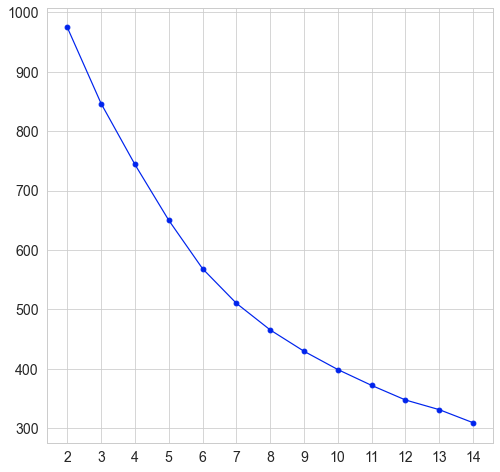

In [35]:
plt.figure(figsize=(8, 8))
plt.plot(n_clusts, inercias, 'o-')
plt.xticks(n_clusts)
plt.grid(visible=True)

Pelo gráfico de cotovelo, o **número ótimo de clusters é 5 ou 6**.

### Método da Silhueta

Silhueta média com N= 2:  0.353
Silhueta média com N= 3:  0.327
Silhueta média com N= 4:  0.331
Silhueta média com N= 5:  0.243
Silhueta média com N= 6:  0.264
Silhueta média com N= 7:  0.289
Silhueta média com N= 8:  0.298
Silhueta média com N= 9:  0.299
Silhueta média com N=10:  0.270


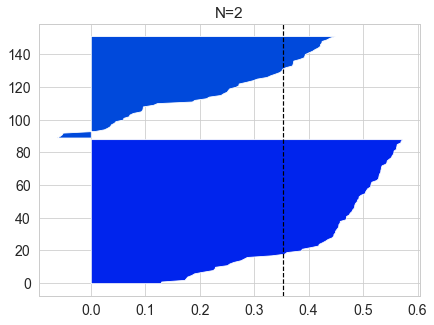

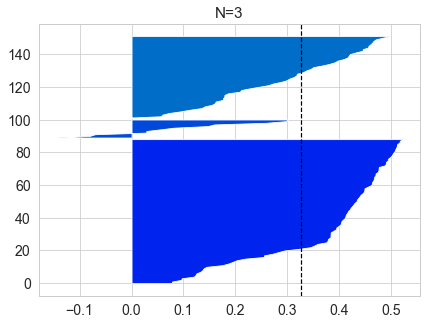

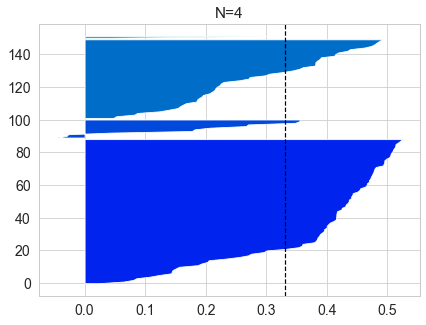

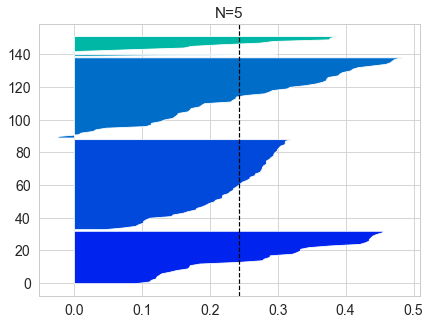

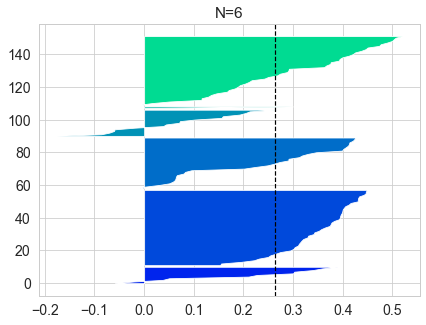

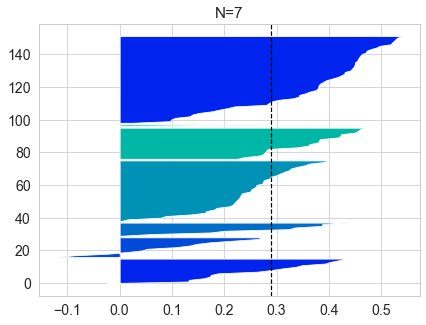

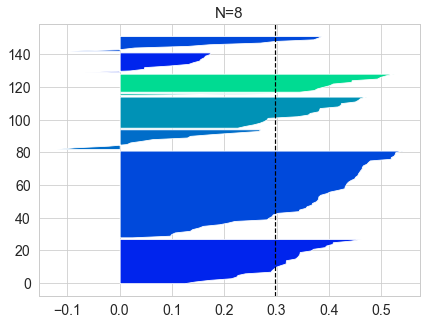

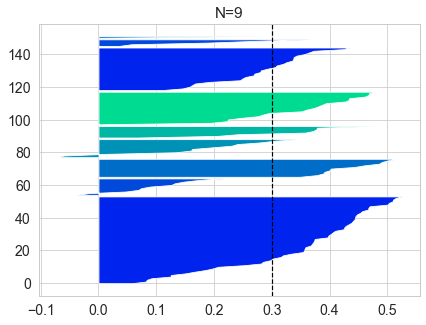

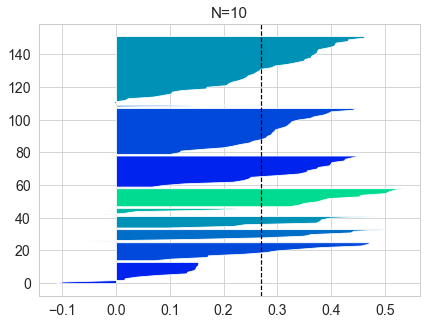

In [36]:
from sklearn.metrics import silhouette_score, silhouette_samples

def plota_centros(df, km, ax):
    n_clusters = km.n_clusters

silhuetas_medias = []
for n_clust in range(2, 10+1):
    km = KMeans(n_clusters=n_clust,
                init='k-means++',
                n_init=100,
                max_iter=1_000,
                random_state=1,
               )
    km.fit(X)
    clusts = km.predict(X)
    df_clust = X.copy()
    df_clust.loc[:,'cluster'] = clusts
    
    silhuetas_medias.append( silhouette_score(X, clusts) )
    print(f'Silhueta média com N={n_clust:2d}: {silhuetas_medias[-1]:6.3f}')
    
    silhuetas_amostras = silhouette_samples(X, clusts)
    
    plt.figure(figsize=(15, 5))
    
    y_lower = 0
    for i in range(n_clust):
        s_clust = np.sort( silhuetas_amostras[clusts==i] )
        
        plt.subplot(1,2,1)
        plt.title(f'N={n_clust}')
        plt.fill_betweenx(np.arange(y_lower,y_lower+s_clust.shape[0]),0,s_clust)
        y_lower = y_lower + s_clust.shape[0]

        
    plt.subplot(1,2,1)
    plt.axvline(silhuetas_medias[-1],color='k',linestyle='--')
    
inercias;

Dados os gráficos de silhuetas, foi escolhida a **divisão desse conjunto de dados em 5 grupos (clusters)**.

- Isso porque para uma clusterização de 6 grupos os valores de silhueta do 2º cluster (de cima para baixo) foram muito baixos e/ou negativos. Assim, os pontos estão próximos à região de fronteira entre dois grupos e/ou mais próximos a outros clusters. Isso significa que tal  divisão pode ser pouco representativa em relação à possíveis grupos dessa base.
- Ainda, com exceção de 1 grupo da divisão em 5 clusters, a volumetria do agrupamento com n=5 é mais estável do que a volumetria do agrupamento com n=6.

## Treinamento do modelo

In [37]:
n_clust = 5
km = KMeans(n_clusters=n_clust, n_init=200, max_iter=3000, random_state=2021)
km.fit(X)

df1.loc[:, 'Cluster'] = km.predict(X)
df1

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),Cluster
3,AFGHANISTAN,2018,0,1.0,1.0,1.0,1.6,5.1,4.1,38.2,19.1,5601.443,2
8,ALBANIA,2017,2,0.0,0.0,0.0,0.5,1.6,16.4,11.3,1.5,176.522,0
15,ALGERIA,2012,2,0.0,0.0,0.0,1.4,4.1,12.4,11.7,3.0,4298.747,0
18,ANGOLA,2015,1,1.0,0.0,0.0,1.1,4.9,3.4,37.6,19.0,5192.358,2
22,ARGENTINA,2019,2,0.0,0.0,0.0,0.2,1.6,10.0,7.9,1.7,3741.882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,VENEZUELA (BOLIVARIAN REPUBLIC OF),2009,2,0.0,0.0,0.0,1.0,4.1,6.4,13.4,2.9,2891.898,0
898,VIET NAM,2017,1,0.0,1.0,0.0,1.2,5.8,5.9,23.8,13.4,7743.873,2
905,YEMEN,2013,0,1.0,1.0,0.0,5.4,16.4,2.5,46.4,39.9,3836.334,1
913,ZAMBIA,2018,1,1.0,0.0,1.0,1.5,4.2,5.2,34.6,11.8,2868.914,2


In [38]:
df1.Cluster.value_counts()

0    56
2    49
4    33
1    12
3     2
Name: Cluster, dtype: int64

Apesar da volumetria baixa dos clusters 1 e 3, ao testar outros Ns para o modelo, os volumes entre os clusters ainda eram muito diferentes. Também, ao examinar o cluster 3, temos Índia e China, países muito particulares.

## Interpretando os grupos

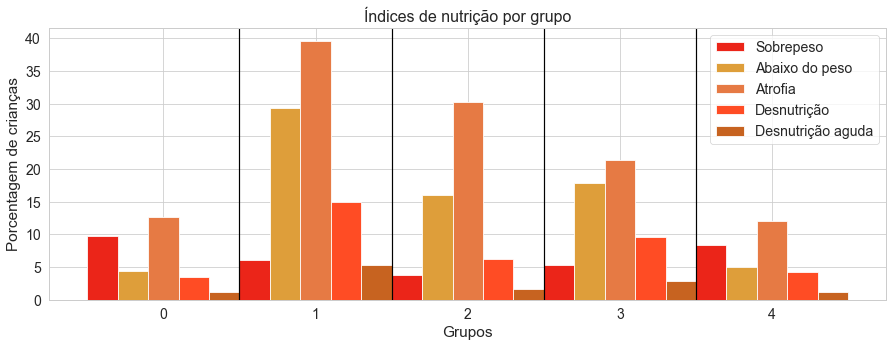

In [39]:
plt.figure(figsize=(15, 5))
x = df1.groupby(by=['Cluster'])[['Overweight', 'Underweight', 'Stunting', 'Severe Wasting', 'Wasting']].mean()
x_arange = np.arange(0, len(x.index))
plt.bar(x_arange-0.4, x['Overweight'], width=.2, label='Sobrepeso', color='#EB2519')
plt.bar(x_arange-0.2, x['Underweight'], width=.2, label='Abaixo do peso', color='#DE9E3A')
plt.bar(x_arange, x['Stunting'], width=.2, label='Atrofia', color='#E67A44')
plt.bar(x_arange+0.2, x['Wasting'], width=.2, label='Desnutrição', color='#FF4C24')
plt.bar(x_arange+0.4, x['Severe Wasting'], width=.2, label='Desnutrição aguda', color='#C76320')
plt.axvline(x=0.5, ymin=0, ymax=50, color='k')
plt.axvline(x=1.5, ymin=0, ymax=50, color='k')
plt.axvline(x=2.5, ymin=0, ymax=50, color='k')
plt.axvline(x=3.5, ymin=0, ymax=50, color='k')
plt.ylabel('Porcentagem de crianças')
plt.xlabel('Grupos')
plt.title('Índices de nutrição por grupo', fontsize=16)
plt.legend()
plt.xticks([0, 1, 2, 3, 4]);

- Grupo 0 parece ser o mais abastado. > taxa de sobrepeso e < taxa dos outros índices.
- Grupo 1 parece ser o mais afetado por esses problemas. > taxa de índices de subnutrição.
- Grupo 4 parece ser o 2º que menos sofre com esses problemas. Baixas taxas de subnutrição, mas um pouco maiores em relação ao grupo 0.
- Grupos 2 e 3 são intermediários, com o grupo 3 demonstrando maiores índices de crianças abaixo do peso e com desnutrição, enquanto o grupo 2 uma presença maior de crianças com atrofia.

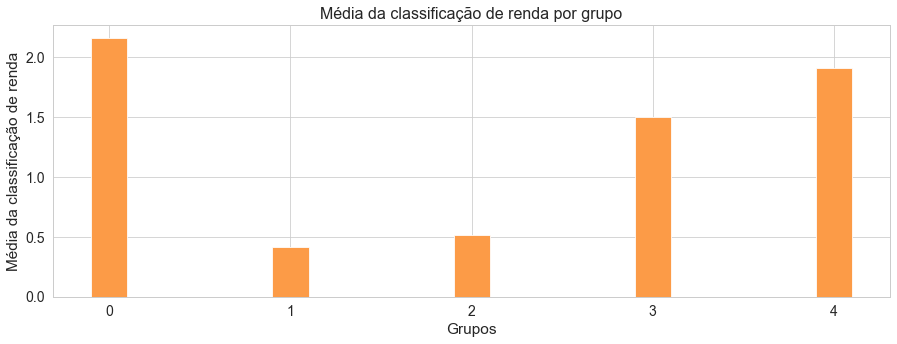

In [40]:
plt.figure(figsize=(15, 5))
x = df1.groupby(by=['Cluster'])[['Income Classification']].mean()
plt.bar([0, 1, 2, 3, 4], x['Income Classification'], width=.2, color='#FC9B47')
plt.ylabel('Média da classificação de renda')
plt.xlabel('Grupos')
plt.title('Média da classificação de renda por grupo', fontsize=16)
plt.xticks([0, 1, 2, 3, 4]);

- Grupo 0 tem a maior renda média. O valor médio apresentado foi maior que 2, ou seja, entre Renda Média-Alta e Renda Alta
- Grupos 1 e 2 têm rendas médias mais baixas, respectivamente, menor e igual a 0.5. Isso significa que esses grupos apresentaram, em sua maioria, valores de Renda Baixa e Renda Média-Baixa.
- Grupo 3 apresentou um valor médio de 1.5, ou seja, está, em sua maioria, entre os valores de Renda Média-Baixa e Renda Média-Alta.
- Grupo 4 apresentou um valor médio pouco menor que 2. Sendo assim, teve uma presença majoritária de países com Renda Média-Alta.

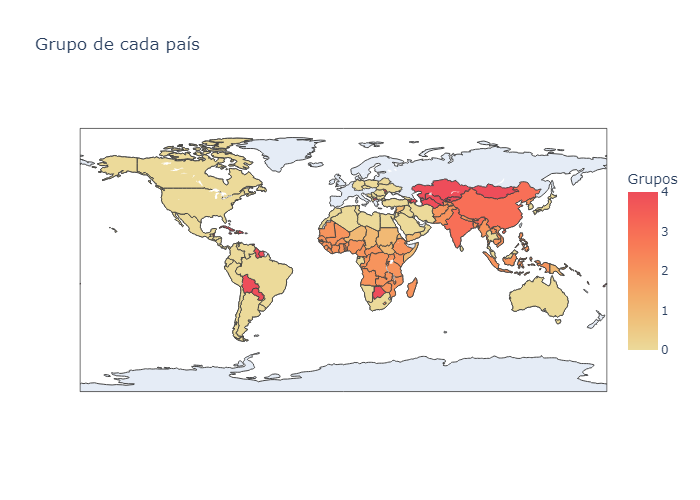

In [41]:
x = df1.groupby(["Country"])["Cluster"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Grupos', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Grupo de cada país")
fig = go.Figure(data = [data],layout = layout)
fig.show(renderer="png")

'''''''''x = df1.groupby(["Country"])["Cluster"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Grupos', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Grupo de cada país")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()''''''''';

Podemos observar que:
- O grupo 0 é composto pela maioria dos países e inclui os países mais 'desenvolvidos', como Canadá, Japão, Alemanha e Austrália.
- O grupo 1 é composto por países do Levante, do Centro-Norte e do Chifre da África, além de Papua-Nova Guiné, que demonstrou péssimos índices de nutrição.
- O grupo 2 é composto pela maioria dos países da Ásia Meridional, África Ocidental, Sudeste asiático e África Meridional, como Paquistão, Gana, Angola e Indonésia.
- O grupo 3 é composto somente por Índia e China, países de grande área geográfica, população e desigualdades socioeconômicas na Ásia.
- O grupo 4 é composto, principalmente, por países da Ásia Central e países mais pobres da América Latina e Europa, como Bolívia, Guiana e Moldávia. Ainda, ele apresenta uma grande quantidade de pequenas nações insulares, como Fiji e Belize.

In [42]:
df1.groupby('Cluster')['LDC', 'LIFD', 'LLDC or SID2', "U5 Population ('000s)"].agg(['mean'])

,LDC,LIFD,LLDC or SID2,U5 Population ('000s)
,mean,mean,mean,mean
Cluster,,,,
0,0.000000,0.017857,0.000000,2683.670446
1,0.833333,0.833333,0.750000,2120.195000
2,0.734694,0.755102,0.571429,5058.986531
3,0.000000,0.500000,0.000000,101444.923500
4,0.030303,0.060606,1.606061,414.014576


Podemos observar que, em média:
- Países do grupo 1 e 2 apresentaram LDCs próximos a 1 (Países Menos Desenvolvidos). Além disso, esses países mostraram LIFD (Déficit Alimentar de Baixa Renda) maiores. Sendo assim, é possível concluir que os **grupos 1 e 2 têm os maiores problemas socioeconômicos**, com o cluster 1 tendo uma situação mais agravada.
- **Grupo 4** apresentou um grande índice de 'LLDC or SID2', o que significa que **é composto por muitas nações insulares em desenvolvimento**. Ainda, a população média abaixo de 5 anos baixa, confirma essa ideia, visto que ilhas costumam ser mais remotas, menores e ter populações menores. 
- **Grupo 0 e grupo 3 não é composto por nenhum país em desenvolvimento sem costa ou ilha-estado em desenvolvimento**.
- **Grupo 1** teve média de 'LLDC or SID2' próxima a 1. Portanto, deve ter uma **grande incidência de países em desenvolvimento**, sendo eles sem costa ou sendo ilhas-estados. 
- **Grupo 3 tem uma grande população de crianças abaixo de 5 anos**. Demonstrando ser composto por países com natalidades muito altas e, possivelmente, populações muito grandes. 

## Identificando e nomeando os grupos

### - Grupo 0: Países que, em geral, sofrem pouco com problemas de nutrição
Exemplos: Estados Unidos da América, Alemanha, República Tcheca e Brasil

### - Grupo 1: Países mais afetados por problemas de nutrição
Exemplos: Sudão do Sul, Síria, Papua-Nova Guiné e Djibuti

### - Grupo 2: Países com grandes problemas de nutrição
Exemplos: Uganda, Mali, Haiti e Etiópia

### - Grupo 3: Gigantes asiáticos
Exemplos: Índia e China

### - Grupo 4: Pequenas nações insulares/costeiras e países de grande extensão territorial esparsamente populados
Exemplos: Mongólia, Fiji, Cuba, Uzbequistão e Bolivia

## Sendo assim, devem ser estabelecidas como linhas de ação para cada grupo:
- **Grupo 0**: É importante o monitoramento dos índices de nutrição para possíveis campanhas, mas, em geral, esses países sofrem pouco com problemas de nutrição. Por outro lado, algumas nações desse grupo devem estabelecer iniciativas de combate ao sobrepeso.
- **Grupo 1**: Apresenta um problema enorme de nutrição e encontra-se em condições socioeconômicas adversas. É necessário o envio urgente de pacotes de ajuda humanitária. Em sua maioria, são nações subdesenvolvidas.
- **Grupo 2**: Países com poucos recursos financeiros e com grandes problemas de nutrição, majoritariamente localizados na África. Essas nações, apesar de mostrarem índices um pouco melhores que o Grupo 1, também se encontram em situações alarmantes e se beneficiariam de pacotes de ajuda humanitária.
- **Grupo 3**: Esses países são territorialmente muito grandes e possuem as maiores populações mundiais. Além das grandes desigualdades socioeconômicas, o grande contingente de crianças abaixo de 5 anos apresenta-se como um grande problema logístico para essas nações. Os países que compõe esse grupo devem alocar uma maior quantidade de recursos e esforço internos, de forma a trabalhar na questão da nutrição nacional.
- **Grupo 4**: Visto que esse grupo é composto por países de populações pequenas e geograficamente concentradas, as ações sociais devem ser assertivas. Essa questão traz oportunidades para possíveis campanhas, mas também desafios de como gerir o espaço (aqui, os países de grande extensão territorial, normalmente, têm pouca terra arável) e os recursos (em sua maioria, nações em desenvolvimento ou subdesenvolvidas) para alimentar suas populações.